# 데이터 전처리

In [1]:
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
lcDataFrame = pd.read_stata('./lendingclub_train.dta')

In [3]:
lcDataFrame

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,1027571,12000,12000,12000.0,0.0789,375.43,90641.0,10.20,0,690,...,0,0,0,0,0,0,0,0,0,0
1,46603,14000,14000,14000.0,0.1147,461.47,46000.0,17.40,1,670,...,0,0,0,1,0,0,0,0,0,0
2,40908,24000,24000,24000.0,0.1147,791.09,90000.0,11.73,2,660,...,0,0,0,0,0,0,0,0,0,0
3,182450,14000,14000,14000.0,0.0949,448.40,115000.0,7.31,0,660,...,0,0,0,0,0,0,0,0,0,0
4,868323,14000,14000,14000.0,0.0999,451.68,78000.0,24.32,0,685,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,480114,32000,32000,32000.0,0.1875,825.71,90000.0,27.39,0,735,...,0,0,0,0,0,0,0,0,0,0
874331,1027649,24000,24000,24000.0,0.0692,740.18,76000.0,34.20,0,685,...,0,0,0,0,0,0,0,0,0,0
874332,773937,4000,4000,4000.0,0.0662,122.82,24960.0,25.29,0,790,...,0,0,0,0,0,0,0,0,0,0
874333,87618,8000,8000,8000.0,0.1288,269.09,53000.0,18.07,2,680,...,0,0,0,1,0,0,0,0,0,0


In [4]:
def concatTwoDataFrames(df1,df2):
    namesOf2 = df2.columns.tolist()
    for name in namesOf2:
        df1[name] = df2[name]
    return df1

In [5]:
def deleteColumnsFromDataFrame(df, L):
    if type(L) == list:
        newDf = df.drop(columns=[]+L)
    elif type(L) == str:
        newDf = df.drop(columns=[L])
    return newDf

In [6]:
def deleteRowFromDataFrame(df, index):
    newDf = df.drop([index], axis=0)
    return newDf

In [7]:
def getDigitList(df, str):
    bucket = []
    for data in df[str]:
        if data != 0:
            bucket.append(1)
        else:
            bucket.append(0)
    return bucket

In [8]:
def eliminateColumn(df, str):
    names_column = df.columns.tolist()
    if str in names_column:
        print('eliminate start ...')
        newDf = df.drop(columns=[str])
        print('eliminate complete.')
        return newDf
    else:
        return df

In [9]:
def getDigitList(df, str):
    bucket = []
    for data in df[str]:
        if data != 0:
            bucket.append(1)
        else:
            bucket.append(0)
    return bucket

In [10]:
def getDigitizedDf(df):
    copyDf = df.copy()  
    names_column = copyDf.columns.tolist()
    names_tobe_digitize = ['delinq_2yrs', 
                           'pub_rec', 
                           'revol_bal', 
                           'collections_12_mths_ex_med', 
                           'pub_rec_bankruptcies', 
                           'tax_liens']
    
    if all(elm in names_column for elm in names_tobe_digitize):
        print('digitize start ...')
        for name in names_tobe_digitize:
            copyDf[name] = getDigitList(copyDf, name)
        print('digitize complete.')
        return copyDf
    else:
        print('digitize failed')
        print('return input data')
        return df

In [11]:
def scaleLog2(df, name):
    bucket = []
    for x in df[name]:
        bucket.append(math.log2(x+1))
    return bucket

In [12]:
def getDataScaledByLog(df):
    copy = df.copy()
    names_tobe_log = ['annual_inc', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']
    print('scale start ...')
    for name in names_tobe_log:
        df[name] = scaleLog2(copy, name)
    print('scale complete.')
    return df

In [13]:
def getInitials(df):
    copy = df.copy()
    names_initial = [
 'loan_amnt',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'fico_range_low',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'inq_last_6mths',
 'pub_rec_bankruptcies',
 'tax_liens',
 'term1',
 'emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12',
 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14',
 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'addr_state19',
 'addr_state20',
 'addr_state21',
 'addr_state22',
 'addr_state23',
 'addr_state24',
 'addr_state25',
 'addr_state26',
 'addr_state27',
 'addr_state28',
 'addr_state29',
 'addr_state30',
 'addr_state31',
 'addr_state32',
 'addr_state33',
 'addr_state34',
 'addr_state35',
 'addr_state36',
 'addr_state37',
 'addr_state38',
 'addr_state39',
 'addr_state40',
 'addr_state41',
 'addr_state42',
 'addr_state43',
 'addr_state44',
 'addr_state45',
 'addr_state46',
 'addr_state47',
 'addr_state48',
 'addr_state49',
 'addr_state50',
 'addr_state51',
 'mths_since_last_delinq1',
 'mths_since_last_delinq2',
 'mths_since_last_delinq3',
 'mths_since_last_delinq4',
 'mths_since_last_delinq5',
 'mths_since_last_delinq6',
 'mths_since_last_delinq7',
 'mths_since_last_delinq8',
 'mths_since_last_delinq9',
 'mths_since_last_delinq10',
 'mths_since_last_delinq11',
 'mths_since_last_major_derog1',
 'mths_since_last_major_derog2',
 'mths_since_last_major_derog3',
 'mths_since_last_major_derog4',
 'mths_since_last_major_derog5',
 'mths_since_last_major_derog6',
 'mths_since_last_major_derog7',
 'mths_since_last_major_derog8',
 'mths_since_last_major_derog9',
 'mths_since_last_major_derog10',
 'mths_since_last_major_derog11',
 'mths_since_last_record1',
 'mths_since_last_record2',
 'mths_since_last_record3',
 'mths_since_last_record4',
 'mths_since_last_record5',
 'mths_since_last_record6',
 'mths_since_last_record7',
 'mths_since_last_record8',
 'mths_since_last_record9',
 'mths_since_last_record10',
 'mths_since_last_record11',
 'mths_since_rcnt_il1',
 'mths_since_rcnt_il2',
 'mths_since_rcnt_il3',
 'mths_since_rcnt_il4',
 'mths_since_rcnt_il5',
 'mths_since_rcnt_il6',
 'mths_since_rcnt_il7',
 'mths_since_rcnt_il8',
 'mths_since_rcnt_il9',
 'mths_since_rcnt_il10',
 'mths_since_rcnt_il11',
 'mths_since_recent_bc1',
 'mths_since_recent_bc2',
 'mths_since_recent_bc3',
 'mths_since_recent_bc4',
 'mths_since_recent_bc5',
 'mths_since_recent_bc6',
 'mths_since_recent_bc7',
 'mths_since_recent_bc8',
 'mths_since_recent_bc9',
 'mths_since_recent_bc10',
 'mths_since_recent_bc11',
 'mths_since_recent_bc_dlq1',
 'mths_since_recent_bc_dlq2',
 'mths_since_recent_bc_dlq3',
 'mths_since_recent_bc_dlq4',
 'mths_since_recent_bc_dlq5',
 'mths_since_recent_bc_dlq6',
 'mths_since_recent_bc_dlq7',
 'mths_since_recent_bc_dlq8',
 'mths_since_recent_bc_dlq9',
 'mths_since_recent_bc_dlq10',
 'mths_since_recent_bc_dlq11',
 'mths_since_recent_inq1',
 'mths_since_recent_inq2',
 'mths_since_recent_inq3',
 'mths_since_recent_inq4',
 'mths_since_recent_inq5',
 'mths_since_recent_inq6',
 'mths_since_recent_inq7',
 'mths_since_recent_inq8',
 'mths_since_recent_inq9',
 'mths_since_recent_inq10',
 'mths_since_recent_revol_delinq1',
 'mths_since_recent_revol_delinq2',
 'mths_since_recent_revol_delinq3',
 'mths_since_recent_revol_delinq4',
 'mths_since_recent_revol_delinq5',
 'mths_since_recent_revol_delinq6',
 'mths_since_recent_revol_delinq7',
 'mths_since_recent_revol_delinq8',
 'mths_since_recent_revol_delinq9',
 'mths_since_recent_revol_delinq10',
 'mths_since_recent_revol_delinq11']
    newDf = pd.DataFrame()
    for name in names_initial:
        newDf[name] = copy[name]
    return newDf

In [14]:
def preprocess_initial(rawDataFrame):
    copy = rawDataFrame.copy()
    # initial 변수만 남기기
    df = getInitials(copy)
    # 행 지우기
    df = deleteRowFromDataFrame(df, 831698)
    # 열 지우기
    df = eliminateColumn(df, 'fico_range_high')
    # 리턴
    return df

In [15]:
def preprocess_scale_digitize(rawDataFrame):
    copy = rawDataFrame.copy()
    # initial 변수만 남기기
    df = getInitials(copy)
    # 행 지우기
    df = deleteRowFromDataFrame(df, 831698)
    # 열 지우기
    df = eliminateColumn(df, 'fico_range_high')
    # 이진화
    df = getDigitizedDf(df)
    # 로그스케일링
    df = getDataScaledByLog(df)
    # 리턴
    return df

In [16]:
def preprocess_y(rawDataFrame):
    copy = rawDataFrame.copy()
    df = copy[['depvar']]
    df = deleteRowFromDataFrame(df, 831698)
    return df

In [17]:
def inverseZero(zeroOneDf):
    bucket = []
    for val in zeroOneDf:
        if val == 0.0:
            bucket.append(1)
        else:
            bucket.append(1)
    return bucket

In [18]:
def preprocess_inversed_y(rawDataFrame):
    newDf = pd.DataFrame()
    copy = rawDataFrame.copy()
#     newDf['depvar'] = inverseZero(copy['depvar'])
    bucket = []
    for val in copy['depvar']:
        if val==1.0:
            bucket.append(0)
        else:
            bucket.append(1)
    newDf['depvar'] = bucket
    newDf = deleteRowFromDataFrame(newDf, 831698)
    return newDf

In [19]:
X_initial = preprocess_initial(lcDataFrame)

eliminate start ...
eliminate complete.


In [20]:
scaled_digitized_X_initial = preprocess_scale_digitize(lcDataFrame)

eliminate start ...
eliminate complete.
digitize start ...
digitize complete.
scale start ...
scale complete.


In [21]:
y = preprocess_y(lcDataFrame)

In [22]:
X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,0,690,5,0,5673,0.405,20,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,1,670,9,0,10285,0.664,18,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,2,660,6,0,18989,0.474,10,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,0,660,16,0,16451,0.401,22,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,0,685,17,0,25930,0.534,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,735,14,0,91190,0.813,17,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,0,685,16,0,38338,0.844,24,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,0,790,15,0,3397,0.092,26,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,2,680,10,1,3304,0.370,24,...,0,0,0,1,0,0,0,0,0,0


In [23]:
scaled_digitized_X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,16.467892,10.20,0,690,2.584963,0.0,1,0.490570,4.392317,...,0,0,0,0,0,0,0,0,0,0
1,14000,15.489378,17.40,1,670,3.321928,0.0,1,0.734655,4.247928,...,0,0,0,1,0,0,0,0,0,0
2,24000,16.457653,11.73,1,660,2.807355,0.0,1,0.559737,3.459432,...,0,0,0,0,0,0,0,0,0,0
3,14000,16.811287,7.31,0,660,4.087463,0.0,1,0.486457,4.523562,...,0,0,0,0,0,0,0,0,0,0
4,14000,16.251205,24.32,0,685,4.169925,0.0,1,0.617298,4.954196,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,16.457653,27.39,0,735,3.906891,0.0,1,0.858379,4.169925,...,0,0,0,0,0,0,0,0,0,0
874331,24000,16.213731,34.20,0,685,4.087463,0.0,1,0.882839,4.643856,...,0,0,0,0,0,0,0,0,0,0
874332,4000,14.607388,25.29,0,790,4.000000,0.0,1,0.126973,4.754888,...,0,0,0,0,0,0,0,0,0,0
874333,8000,15.693732,18.07,1,680,3.459432,1.0,1,0.454176,4.643856,...,0,0,0,1,0,0,0,0,0,0


In [24]:
y

,depvar
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
874330,0.0
874331,0.0
874332,0.0
874333,0.0


In [25]:
def getOrdinal(initialXdf):
    copy = initialXdf.copy()
    names_ordinal = [
        'loan_amnt',
        'annual_inc',
        'dti',
        'delinq_2yrs',
        'fico_range_low',
        'open_acc',
        'pub_rec',
        'revol_bal',
        'revol_util',
        'total_acc',
        'collections_12_mths_ex_med',
        'inq_last_6mths',
        'pub_rec_bankruptcies',
        'tax_liens'
    ]
    newDf = pd.DataFrame()
    for name in names_ordinal:
        newDf[name] = copy[name]
    return newDf

In [26]:
X_initial_ordinal = getOrdinal(X_initial)

In [27]:
X_initial_ordinal

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,inq_last_6mths,pub_rec_bankruptcies,tax_liens
0,12000,90641.0,10.20,0,690,5,0,5673,0.405,20,0,1,0,0
1,14000,46000.0,17.40,1,670,9,0,10285,0.664,18,0,0,0,0
2,24000,90000.0,11.73,2,660,6,0,18989,0.474,10,0,0,0,0
3,14000,115000.0,7.31,0,660,16,0,16451,0.401,22,0,1,0,0
4,14000,78000.0,24.32,0,685,17,0,25930,0.534,30,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,735,14,0,91190,0.813,17,0,0,0,0
874331,24000,76000.0,34.20,0,685,16,0,38338,0.844,24,0,0,0,0
874332,4000,24960.0,25.29,0,790,15,0,3397,0.092,26,0,2,0,0
874333,8000,53000.0,18.07,2,680,10,1,3304,0.370,24,0,1,1,0


In [28]:
y

,depvar
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
874330,0.0
874331,0.0
874332,0.0
874333,0.0


In [29]:
inversed_y = preprocess_inversed_y(lcDataFrame)

# 이하부터 사용 가능한 변수 이름들

In [30]:
# X_initial
# scaled_digitized_X_initial
# X_initial_ordinal
# y
# inversed_y 

# RandomForest

In [31]:
# 환경
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

ros = RandomOverSampler(random_state=100)

# training set과 test set 구분
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(X_initial, y, test_size=0.3, random_state=100)
X_train_initial, y_train_initial = ros.fit_resample(X_train_initial, y_train_initial)
X_train_scaled_digitized, X_test_scaled_digitized, y_train_scaled_digitized, y_test_scaled_digitized = train_test_split(scaled_digitized_X_initial, y, test_size=0.3, random_state=100)
X_train_scaled_digitized, y_train_scaled_digitized = ros.fit_resample(X_train_scaled_digitized, y_train_scaled_digitized)
X_train_ordinal, X_test_ordinal, y_train_ordinal, y_test_ordinal = train_test_split(X_initial_ordinal, y, test_size=0.3, random_state=100)

In [32]:
def get_clf_eval(model_name, y_test, params=None, pred=None, pred_proba_po=None):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
    from sklearn.metrics import f1_score, roc_auc_score
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)

    print("-------------------------------")
    if model_name == 'XGBoost':
        print('XGBoost', "- max_depth:", params["max_depth"], ", eta: ", params["eta"], "Model")
    else : print(model_name)
    print("오차 행렬")
    print(pd.DataFrame(confusion))
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

## 1. X_initial

### 1) 모델 구축

In [33]:
# Randomforest 모델 생성 및 학습
## X_initial 사용
RF_initial = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=10, random_state=100) # Create a random forest classifier and fit it to the training data
RF_initial.fit(X_train_initial, y_train_initial) 

# Randomforest 모델을 이용한 예측치 생성
y_pred_initial = RF_initial.predict(X_test_initial)

# 5분이내

### 2) 모델 평가
#### 2-1. Accuracy

In [34]:
# X_initial 이용
accuracy_initial = accuracy_score(y_test_initial, y_pred_initial) # Calculate the accuracy of the model
print("Accuracy:", accuracy_initial)

Accuracy: 0.6039740603352637


#### 2-2. ROC

In [35]:
# 환경
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [36]:
# ROC Curve 계산을 위한 y_proba 구하기(y_proba: positive class에 속할 확률 예측값)
y_proba_initial = RF_initial.predict_proba(X_test_initial)[:, 1] # predict probability for positive class (1)
fpr_initial, tpr_initial, thresholds_initial = roc_curve(y_test_initial, y_proba_initial) # calculate false positive rate, true positive rate and thresholds
roc_auc_initial = auc(fpr_initial, tpr_initial) # calculate area under curve (AUC)

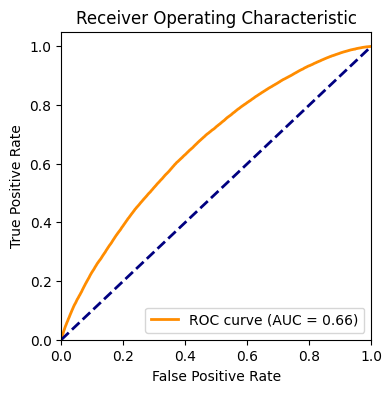

In [37]:
plt.figure(figsize=(4, 4))
plt.plot(fpr_initial, tpr_initial, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_initial)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2-3. 과적합 판단

In [39]:
# 훈련 데이터와 테스트 데이터의 예측 성능 계산
train_acc_initial = accuracy_score(y_train_initial, RF_initial.predict(X_train_initial))
test_acc_initial = accuracy_score(y_test_initial, RF_initial.predict(X_test_initial))

In [40]:
# 훈련 데이터와 테스트 데이터의 성능 차이 계산
diff_acc_initial = train_acc_initial - test_acc_initial

In [41]:
# 성능 차이 출력
print('Using X_initial')
print('Training accuracy:', train_acc_initial)
print('Test accuracy:', test_acc_initial)
print('Difference in accuracy:', diff_acc_initial)

Using X_initial
Training accuracy: 0.6258327092889013
Test accuracy: 0.6039740603352637
Difference in accuracy: 0.02185864895363765


#### 2-4. importance 출력

In [42]:
importances_initial = RF_initial.feature_importances_

# 중요도가 높은 feature 순서대로 index를 정렬
sorted_idx_initial = importances_initial.argsort()[::-1]

# 시각화
plt.rc("figure", figsize=(10, 30))
plt.barh(range(X_train_initial.shape[1]), importances_initial[sorted_idx_initial[::-1]], color="#e84225")
plt.yticks(range(X_train_initial.shape[1]), [f"{i+1}. {X_train_initial.columns[sorted_idx_initial[::-1]][i]} ({importances_initial[sorted_idx_initial[::-1]][i]:.4f})" for i in range(X_train_initial.shape[1])])
plt.title("Feature importances")
plt.show()

In [346]:
get_clf_eval('RandomForestClassifier', y_test_initial, params=None, pred=y_pred_initial, pred_proba_po = y_proba_initial)

-------------------------------
RandomForestClassifier
오차 행렬
        0      1
0  131577  88290
1   15588  26846
정확도: 0.6040, 정밀도: 0.2332, 재현율: 0.6327, F1: 0.3408, AUC: 0.6622


## 2. scaled_digitized_X_initial
### 1) 모델 구축

In [347]:
# Randomforest 모델 생성 및 학습
## scaled_digitized_X_initial 사용
RF_scaled_digitized = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=10, random_state=100)
RF_scaled_digitized.fit(X_train_scaled_digitized, y_train_scaled_digitized)

# Randomforest 모델을 이용한 예측치 생성
y_pred_scaled_digitized = RF_scaled_digitized.predict(X_test_scaled_digitized)

### 2) 모델 평가
#### 2-1. Accuracy

In [348]:
# scaled_digitized_X_initial 이용
accuracy_scaled_digitized = accuracy_score(y_test_scaled_digitized, y_pred_scaled_digitized) 
print("(digitized) Accuracy:", accuracy_initial)

(digitized) Accuracy: 0.6039740603352637


#### 2-2. ROC

In [ ]:
# 환경
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [349]:
# ROC Curve 계산을 위한 y_proba 구하기(y_proba: positive class에 속할 확률 예측값)
y_proba_scaled_digitized = RF_scaled_digitized.predict_proba(X_test_scaled_digitized)[:, 1] # predict probability for positive class (1)
fpr_scaled_digitized, tpr_scaled_digitized, thresholds_scaled_digitized = roc_curve(y_test_scaled_digitized, y_proba_scaled_digitized) # calculate false positive rate, true positive rate and thresholds
roc_auc_scaled_digitized = auc(fpr_scaled_digitized, tpr_scaled_digitized) # calculate area under curve (AUC)

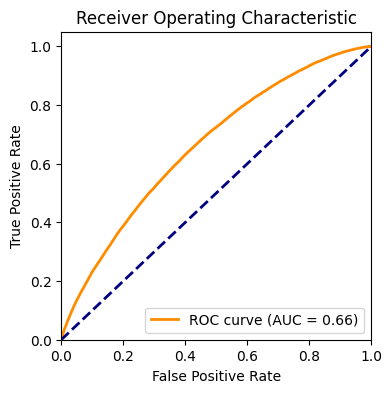

In [350]:
plt.figure(figsize=(4, 4))
plt.plot(fpr_scaled_digitized, tpr_scaled_digitized, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_scaled_digitized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2-3. 과적합 판단

In [351]:
# 훈련 데이터와 테스트 데이터의 예측 성능 계산
train_acc_digitized = accuracy_score(y_train_scaled_digitized, RF_scaled_digitized.predict(X_train_scaled_digitized))
test_acc_digitized = accuracy_score(y_test_scaled_digitized, RF_scaled_digitized.predict(X_test_scaled_digitized))

In [352]:
# 훈련 데이터와 테스트 데이터의 성능 차이 계산
diff_acc_digitized = train_acc_digitized - test_acc_digitized

In [353]:
# 성능 차이 출력
print('Using scaled_digitized_X_initial')
print('Training accuracy:', train_acc_digitized)
print('Test accuracy:', test_acc_digitized)
print('Difference in accuracy:', diff_acc_digitized)

Using scaled_digitized_X_initial
Training accuracy: 0.6249015179880808
Test accuracy: 0.60423711690005
Difference in accuracy: 0.020664401088030804


#### 2-4. importance 출력

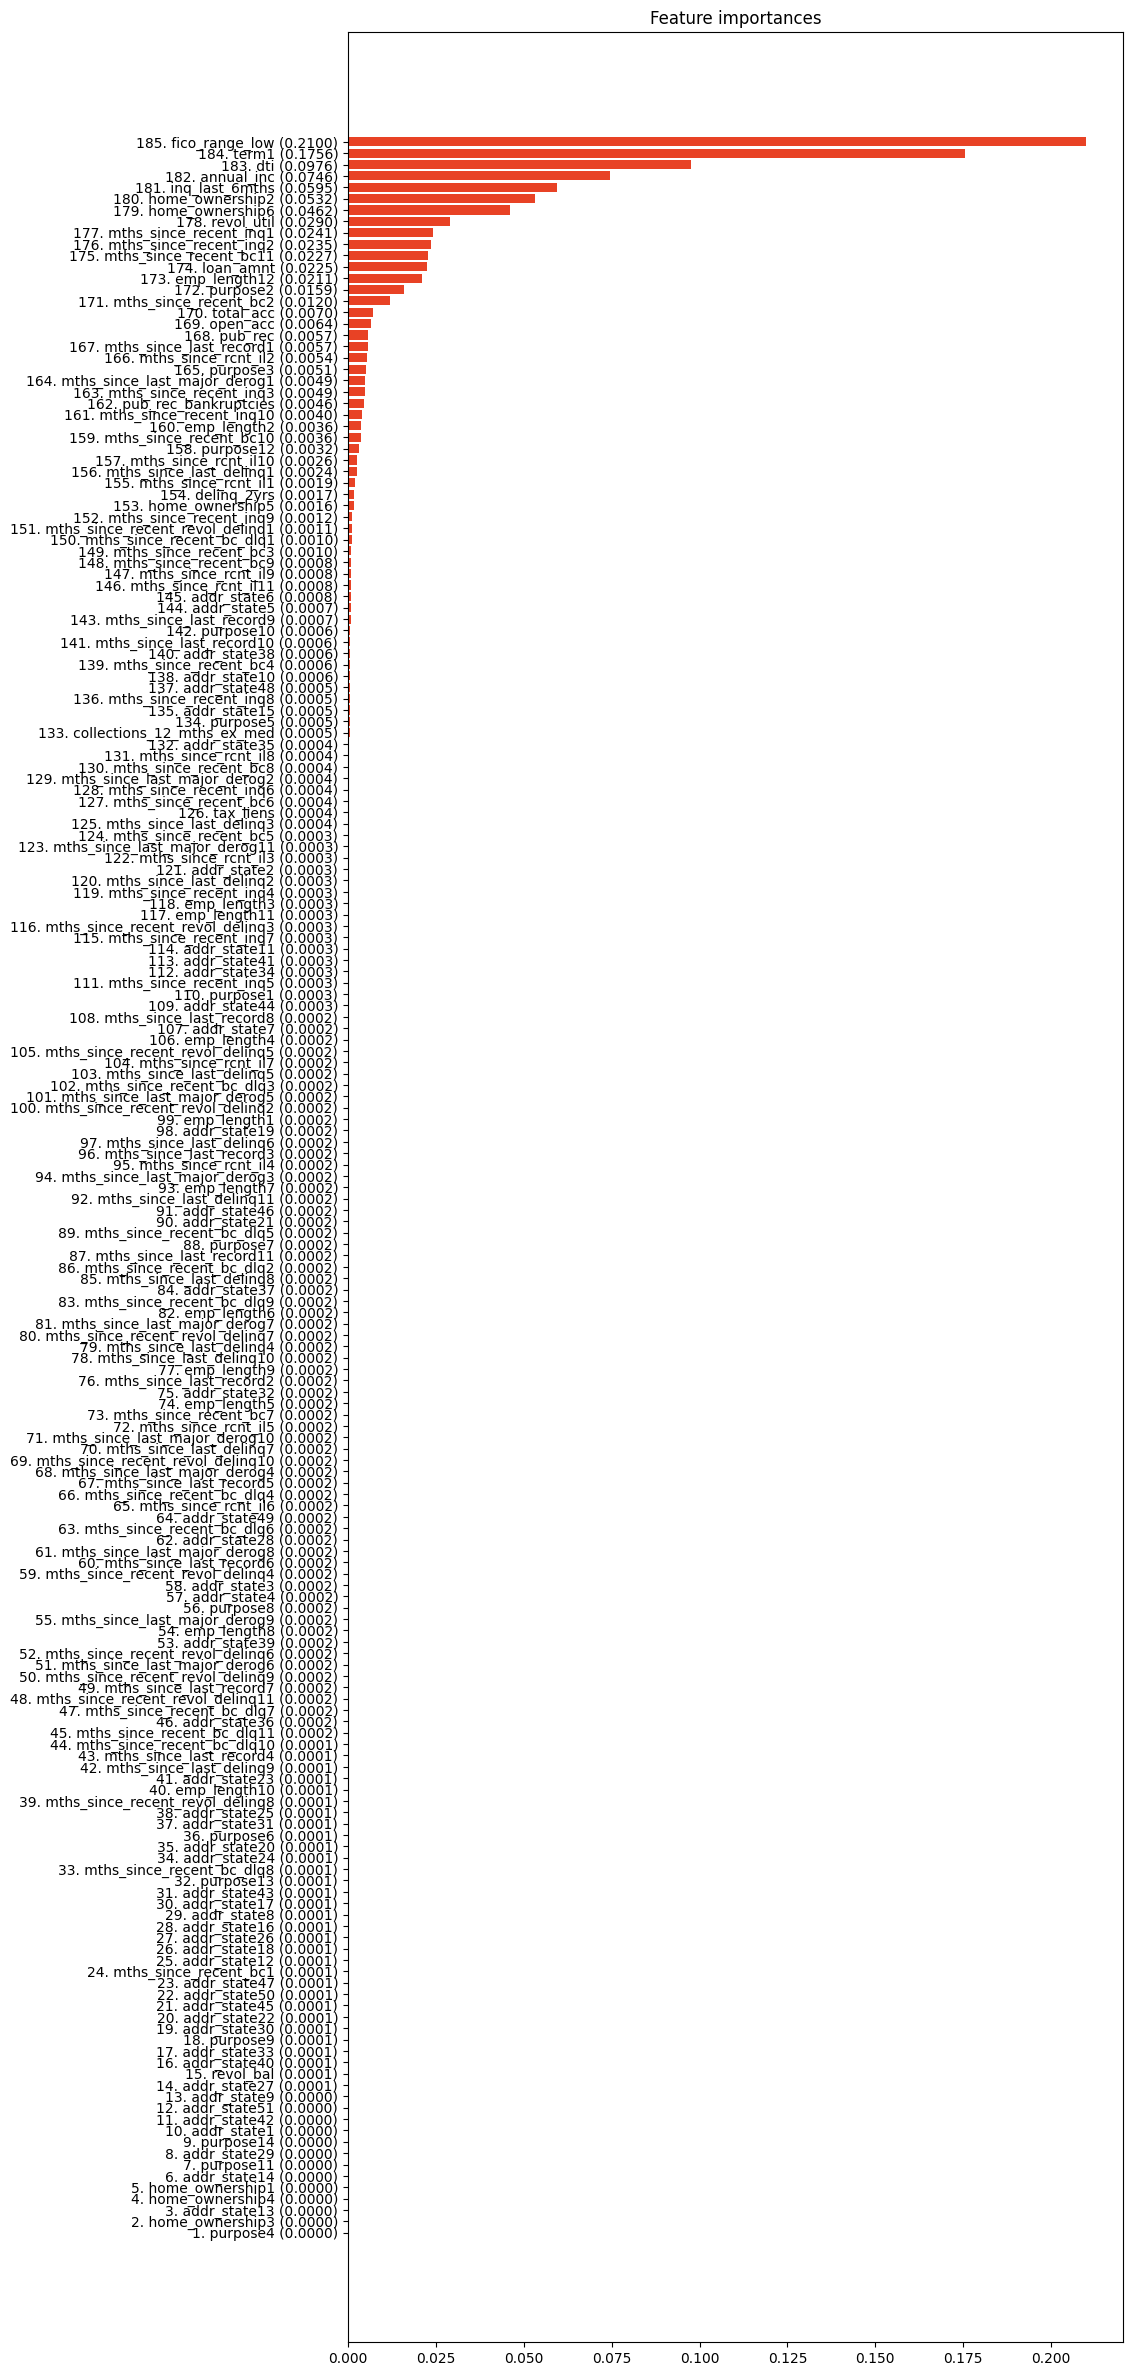

In [354]:
importances_scaled_digitized = RF_scaled_digitized.feature_importances_

# 중요도가 높은 feature 순서대로 index를 정렬
sorted_idx_scaled_digitized = importances_scaled_digitized.argsort()[::-1]

# 시각화
plt.rc("figure", figsize=(10, 30))
plt.barh(range(X_train_scaled_digitized.shape[1]), importances_scaled_digitized[sorted_idx_scaled_digitized[::-1]], color="#e84225")
plt.yticks(range(X_train_scaled_digitized.shape[1]), [f"{i+1}. {X_train_scaled_digitized.columns[sorted_idx_scaled_digitized[::-1]][i]} ({importances_scaled_digitized[sorted_idx_scaled_digitized[::-1]][i]:.4f})" for i in range(X_train_scaled_digitized.shape[1])])
plt.title("Feature importances")
plt.show()

#### 2-5. 혼동행렬

In [355]:
get_clf_eval('RandomForestClassifier', y_test_scaled_digitized, params=None, pred=y_pred_scaled_digitized, pred_proba_po = y_proba_scaled_digitized)

-------------------------------
RandomForestClassifier
오차 행렬
        0      1
0  131664  88203
1   15606  26828
정확도: 0.6042, 정밀도: 0.2332, 재현율: 0.6322, F1: 0.3407, AUC: 0.6615
